# Chapter 2. Fancy Tricks with Simple Numbers

In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Example 2-1. Binarizing listen counts in the Million Song Dataset

### The Echo Nest Taste Profile Subset 

http://labrosa.ee.columbia.edu/millionsong/sites/default/files/challenge/train_triplets.txt.zip

In [3]:
listen_count = pd.read_csv('data/millionsong/train_triplets.txt.zip', header=None, delimiter='\t')
listen_count.shape

(48373586, 3)

In [4]:
listen_count.head()  # user - song - count

,0,1,2
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1


In [5]:
# 재생 카운트 최대값
np.max(listen_count[2])

9667

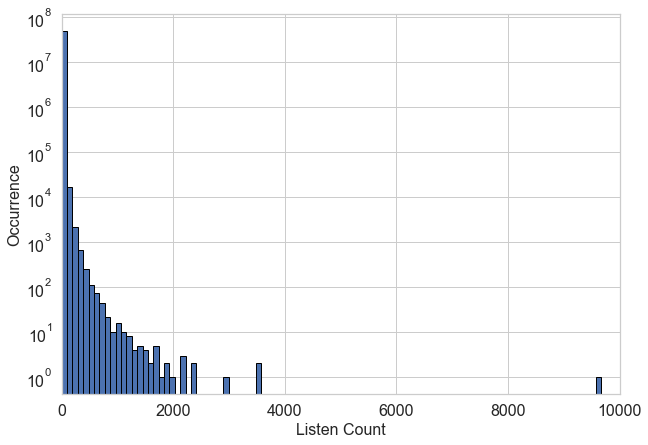

In [6]:
# 그림 2-3
sns.set_style('whitegrid')
plt.figure(figsize=(10, 7))
plt.hist(listen_count[2], bins = 100, edgecolor='black')
plt.yscale('log', nonposy='clip')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlim([0,10000])
_ = plt.xlabel('Listen Count', fontsize=16)
_ = plt.ylabel('Occurrence', fontsize=16)

## Example 2-2. Visualizing business review counts in the Yelp dataset

### Yelp Challenge Round 12

https://www.yelp.com/dataset/challenge

In [7]:
import json

In [8]:
def load_json_df(filename, num_bytes = -1):
    '''Load the first `num_bytes` of the filename as a json blob, convert each line into a row in a Pandas data frame.'''
    # windows에서 실행하는 경우 기본 인코딩이 cp949 이므로 encoding 값 지정해야 함.
    fs = open(filename, encoding='utf-8')
    df = pd.DataFrame([json.loads(x) for x in fs.readlines(num_bytes)])
    fs.close()
    return df

In [9]:
# 비즈니스 데이터 로드
biz_df = load_json_df('data/yelp/yelp_academic_dataset_business.json')
biz_df.shape

(188593, 15)

In [10]:
biz_df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,"{'BikeParking': 'False', 'BusinessAcceptsCredi...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,24,4.0,AB
1,,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0...",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,3,4.5,NV
2,1335 rue Beaubien E,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandw...",Montréal,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'...",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,5,4.0,QC
3,211 W Monroe St,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,None,1,33.449999,-112.076979,Geico Insurance,,85003,8,1.5,AZ
4,2005 Alyth Place SE,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping...",Calgary,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,51.035591,-114.027366,Action Engine,,T2H 0N5,4,2.0,AB


In [11]:
# 리뷰 카운트 최대값
biz_df['review_count'].max()

7968

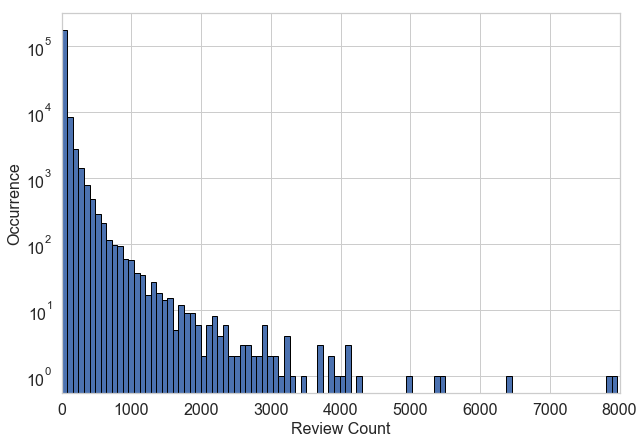

In [12]:
# 그림 2-4
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))
biz_df['review_count'].hist(ax=ax, bins=100, edgecolor='black')
ax.set_yscale('log', nonposy='clip')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlim([0,8000])
_ = ax.set_xlabel('Review Count', fontsize=16)
_ = ax.set_ylabel('Occurrence', fontsize=16)

## Example 2-3. Quantizing counts with fixed-width bins

In [13]:
# 0에서 99 사이에서 균일하게 20 개의 무작위 정수 생성
small_counts = np.random.randint(0, 100, 20) 
small_counts

array([98,  0, 25, 75, 19, 33,  2, 20, 45, 10, 75, 74, 30, 62, 34, 41, 23,
        8, 58, 95])

In [14]:
# 10으로 나누기를 하여 동일한 구간을 갖는 빈0 - 9에 매핑
np.floor_divide(small_counts, 10)

array([9, 0, 2, 7, 1, 3, 0, 2, 4, 1, 7, 7, 3, 6, 3, 4, 2, 0, 5, 9],
      dtype=int32)

In [15]:
# 여러 자릿수에 걸쳐 있는 카운트의 배열
large_counts = [296, 8286, 64011, 80, 3, 725, 867, 2215, 7689, 11495, 91897, 44, 28, 7971, 926, 122, 22222] 

# 로그 함수를 통해 지수 폭 빈에 매핑
np.floor(np.log10(large_counts))

array([2., 3., 4., 1., 0., 2., 2., 3., 3., 4., 4., 1., 1., 3., 2., 2., 4.])

## Example 2-4. Computing deciles of Yelp business review counts

In [16]:
deciles = biz_df['review_count'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9]) 
deciles 

0.1     3.0
0.2     4.0
0.3     5.0
0.4     6.0
0.5     9.0
0.6    12.0
0.7    19.0
0.8    31.0
0.9    66.0
Name: review_count, dtype: float64

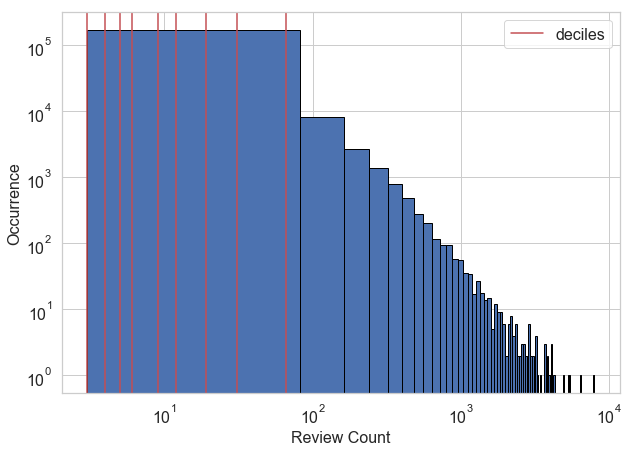

In [17]:
# 그림 2-5

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))
biz_df['review_count'].hist(ax=ax, bins=100, edgecolor='black') 
for pos in deciles:
    handle = plt.axvline(pos, color='r')
ax.legend([handle], ['deciles'], fontsize=16) 
ax.set_xscale('log', nonposy='clip')
ax.set_yscale('log', nonposy='clip')
ax.tick_params(labelsize=16)
_ = ax.set_xlabel('Review Count', fontsize=16) 
_ = ax.set_ylabel('Occurrence', fontsize=16)

## Example 2-5. Binning counts by quantiles

In [18]:
# 카운트를 사분위수와 매핑
pd.qcut(large_counts, 4, labels=False)

array([1, 2, 3, 0, 0, 1, 1, 2, 2, 3, 3, 0, 0, 2, 1, 0, 3], dtype=int64)

In [19]:
# 분위수 계산
large_counts_series = pd.Series(large_counts) 
large_counts_series.quantile([0.25, 0.5, 0.75]) 

0.25     122.0
0.50     926.0
0.75    8286.0
dtype: float64

## Example 2-6. Visualizing the distribution of review counts before and after log transform

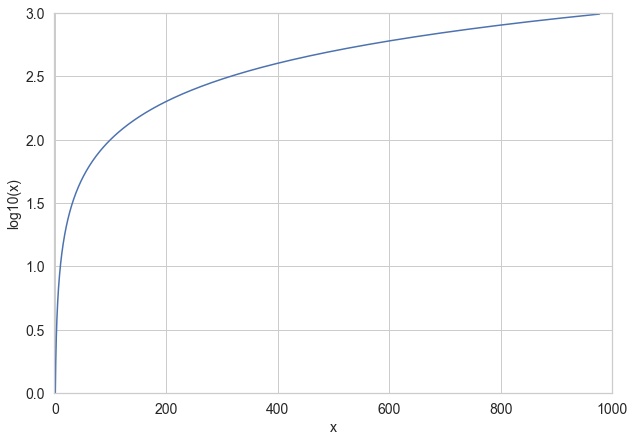

In [20]:
# 그림 2-6
y = np.arange(0.00001, 3, 0.01)
x = np.power(10, y)

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(x, y, 'b')
ax.tick_params(labelsize=14)
plt.xlim([-1,1000])
plt.ylim([0,3.0])
_ = ax.set_xlabel('x', fontsize=14)
_ = ax.set_ylabel('log10(x)', fontsize=14)

In [21]:
# 리뷰 카운트에 대한 로그 변환
biz_df['log_review_count'] = np.log10(biz_df['review_count'] + 1)

Text(0,0.5,'Occurrence')

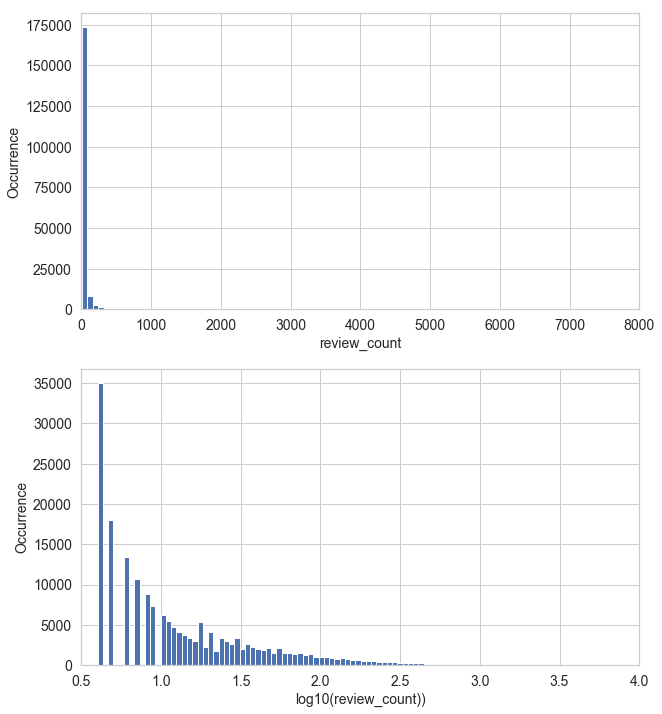

In [22]:
# 그림 2-7

# 로그 변환 이전
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10, 12))
biz_df['review_count'].hist(ax=ax1, bins=100) 
ax1.tick_params(labelsize=14)
ax1.set_xlim([0,8000])
ax1.set_xlabel('review_count', fontsize=14) 
ax1.set_ylabel('Occurrence', fontsize=14)

# 로그 변환 이후
biz_df['log_review_count'].hist(ax=ax2, bins=100) 
ax2.tick_params(labelsize=14)
ax2.set_xlim([0.5,4.0])
ax2.set_xlabel('log10(review_count))', fontsize=14) 
ax2.set_ylabel('Occurrence', fontsize=14)

## Example 2-7. Visualizing the distribution of news article popularity with and without log transformation

### Online News Popularity Dataset

https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity

In [23]:
news_df = pd.read_csv('data/NewsPopularity/OnlineNewsPopularity.csv', delimiter=', ')   # warning 무시
news_df.head()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [24]:
news_df.shape

(39644, 61)

In [25]:
news_df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [26]:
news_df['log_n_tokens_content'] = np.log10(news_df['n_tokens_content'] + 1)

Text(0,0.5,'Number of Articles')

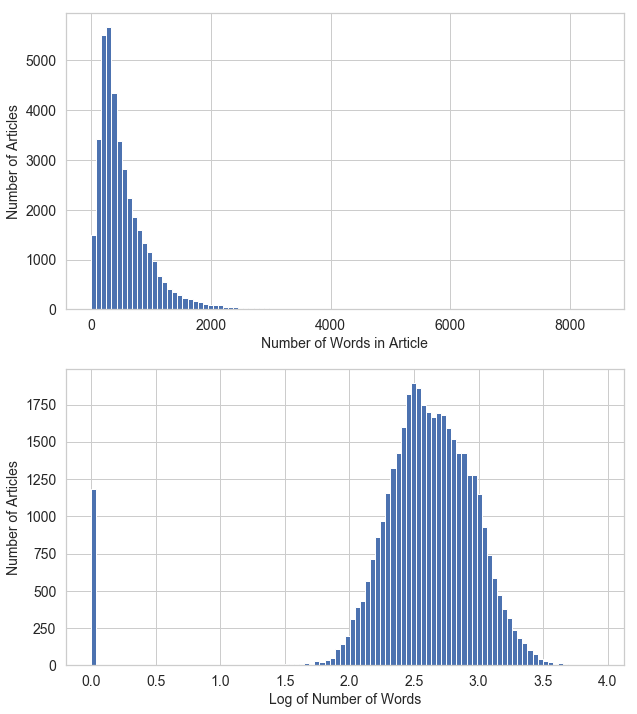

In [27]:
# 그림 2-8
plt.figure(figsize=(10, 12))
ax = plt.subplot(2,1,1)
news_df['n_tokens_content'].hist(ax=ax, bins=100)
ax.tick_params(labelsize=14)
ax.set_xlabel('Number of Words in Article', fontsize=14)
ax.set_ylabel('Number of Articles', fontsize=14)

ax = plt.subplot(2,1,2)
news_df['log_n_tokens_content'].hist(ax=ax, bins=100)
ax.tick_params(labelsize=14)
ax.set_xlabel('Log of Number of Words', fontsize=14)
ax.set_ylabel('Number of Articles', fontsize=14)

## Example 2-8. Using log transformed Yelp review counts to predict average business rating

In [28]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

In [29]:
# 선형 회귀 모델을 학습시켜 비즈니스의 평균 별점 등급을 예측하기 위해
# review_count 피쳐의 로그 변환 이전 값과 이후 값을 사용한다.
# 두 모델의 10 등분 교차 검증 점수를 비교한다.

m_orig = linear_model.LinearRegression()
scores_orig = cross_val_score(m_orig, biz_df[['review_count']], biz_df['stars'], cv=10)

m_log = linear_model.LinearRegression()
scores_log = cross_val_score(m_log, biz_df[['log_review_count']], biz_df['stars'], cv=10)

print("R-squared score without log transform: %0.5f (+/- %0.5f)" % (scores_orig.mean(), scores_orig.std() * 2))
print("R-squared score with log transform: %0.5f (+/- %0.5f)" % (scores_log.mean(), scores_log.std() * 2))

R-squared score without log transform: 0.00085 (+/- 0.00137)
R-squared score with log transform: 0.00236 (+/- 0.00124)


## Example 2-9. Using log transformed word counts in the Online News Popularity dataset to predict article popularity

In [30]:
# 뉴스 기사의 공유 횟수를 예측하기 위해 두 개의 선형 회귀 모델을 학습시킨다.
# 한 모델은 원래의 피쳐를 사용하고, 다른 모델은 로그 변환된 피쳐를 사용한다.

news_orig_model = linear_model.LinearRegression()
scores_orig = cross_val_score(news_orig_model, news_df[['n_tokens_content']], news_df['shares'], cv=10)

news_log_model = linear_model.LinearRegression()
scores_log = cross_val_score(news_log_model, news_df[['log_n_tokens_content']], news_df['shares'], cv=10)

print("R-squared score without log transform: %0.5f (+/- %0.5f)" % (scores_orig.mean(), scores_orig.std() * 2))

print("R-squared score with log transform: %0.5f (+/- %0.5f)" % (scores_log.mean(), scores_log.std() * 2))

R-squared score without log transform: -0.00242 (+/- 0.00509)
R-squared score with log transform: -0.00114 (+/- 0.00418)


## Example 2-10. Visualizing the correlation between input and output in the news popularity prediction problem

Text(0,0.5,'Number of Shares')

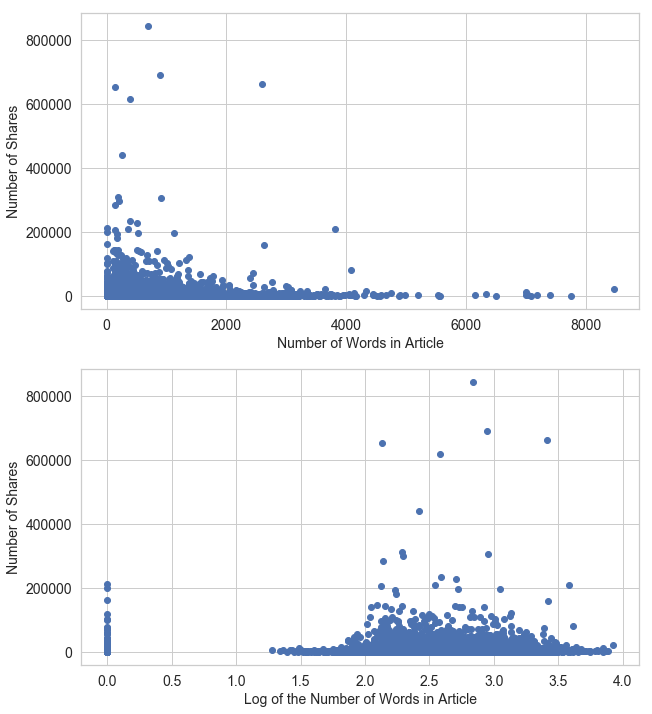

In [31]:
# 그림 2-9
plt.figure(figsize=(10, 12))
ax1 = plt.subplot(2,1,1)
ax1.scatter(news_df['n_tokens_content'], news_df['shares'])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Number of Words in Article', fontsize=14)
ax1.set_ylabel('Number of Shares', fontsize=14)

ax2 = plt.subplot(2,1,2)
ax2.scatter(news_df['log_n_tokens_content'], news_df['shares'])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of the Number of Words in Article', fontsize=14)
ax2.set_ylabel('Number of Shares', fontsize=14)

## Example 2-11. Visualizing the correlation between input and output in Yelp business review prediction

Text(0,0.5,'Average Star Rating')

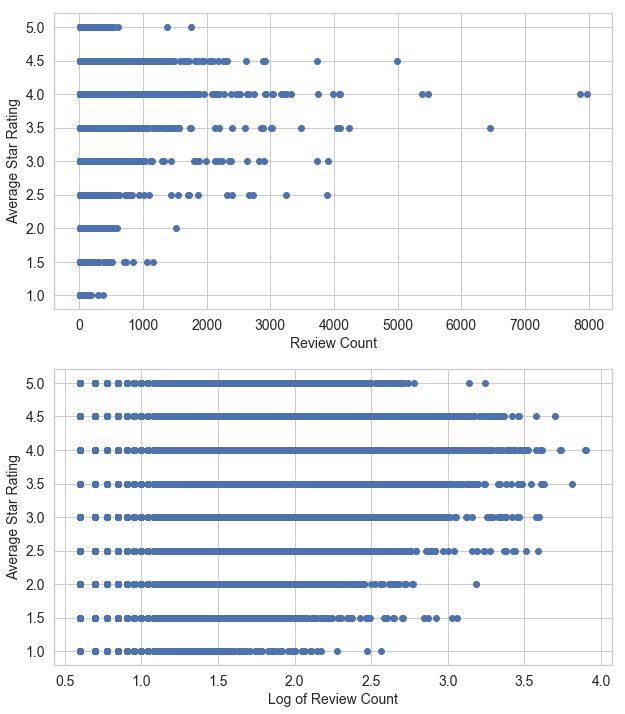

In [32]:
# 그림 2-10
plt.figure(figsize=(10, 12))
ax1 = plt.subplot(2,1,1)
ax1.scatter(biz_df['review_count'], biz_df['stars'])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Review Count', fontsize=14)
ax1.set_ylabel('Average Star Rating', fontsize=14)

ax2 = plt.subplot(2,1,2)
ax2.scatter(biz_df['log_review_count'], biz_df['stars'])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of Review Count', fontsize=14)
ax2.set_ylabel('Average Star Rating', fontsize=14)

## Example 2-12. Box-Cox transformation of Yelp business review counts

In [33]:
x = np.arange(0.001, 3, 0.01)
lambda0 = np.log(x)
one_quarter = (x**0.25 - 1)/0.25
square_root = (x**0.5 - 1)/0.5
three_quarters = (x**0.75 - 1)/0.75
one_point_five = (x**1.5 - 1)/1.5

Text(0.5,1,'Box-Cox Transforms')

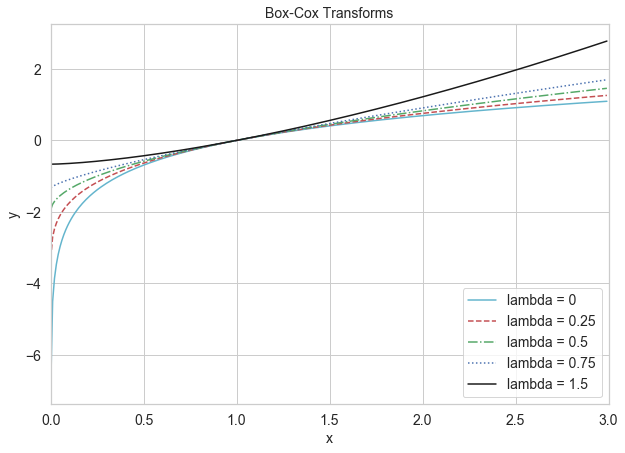

In [34]:
# 그림 2-12
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(x, lambda0, 'c', 
         x, one_quarter, 'r--', 
         x, square_root, 'g-.', 
         x, three_quarters, 'b:',
         x, one_point_five, 'k')
plt.legend(['lambda = 0', 'lambda = 0.25', 'lambda = 0.5', 'lambda = 0.75', 'lambda = 1.5'], 
           loc='lower right',
           prop={'size': 14})
ax.tick_params(labelsize=14)
ax.set_xlim([0.0,3.0])
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_title('Box-Cox Transforms', fontsize=14)

In [35]:
from scipy import stats

In [36]:
# Box-Cox 변환은 입력 데이터가 양수라고 가정한다.
# 최소값을 확인한다.
biz_df['review_count'].min()

3

In [37]:
# 입력 파라미터 lmbda를 0으로 설정하면 로그 변환을 한다 (상수 오프셋 없음)
rc_log = stats.boxcox(biz_df['review_count'], lmbda=0)

# 기본적으로 Box-Cox 변환의 scipy 구현은 
# 출력을 정규 분포에 가장 가깝게 만드는 람다 파라미터를 찾는다.
rc_bc, bc_params = stats.boxcox(biz_df['review_count'])
bc_params

-0.3809438089654094

## Example 2-13. Visualizing the histograms of original, log transformed, and Box-Cox transformed counts

In [38]:
biz_df['rc_bc'] = rc_bc
biz_df['rc_log'] = rc_log

Text(0,0.5,'Occurrence')

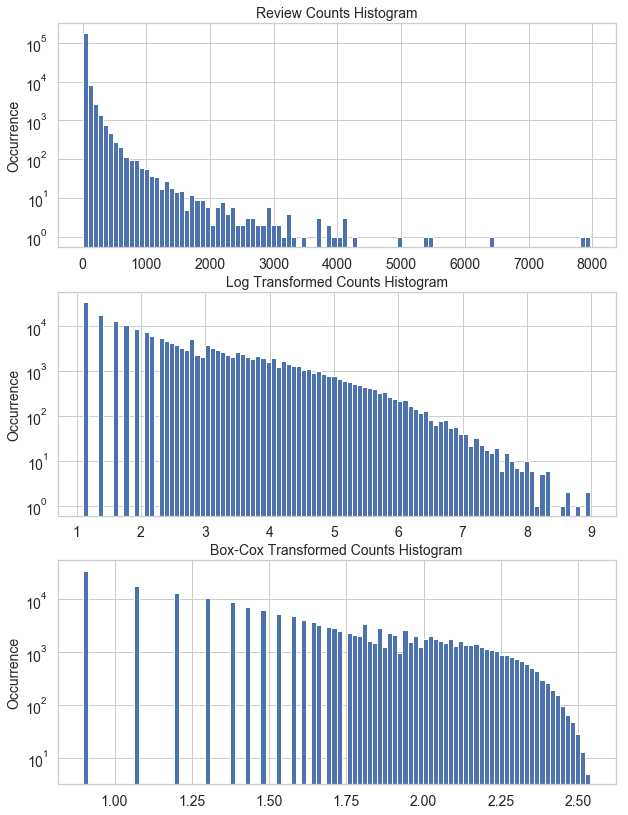

In [39]:
# 그림 2-13
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10, 14))

# 원본 리뷰 카운트 히스토그램
biz_df['review_count'].hist(ax=ax1, bins=100)
ax1.set_yscale('log', nonposy='clip')
ax1.tick_params(labelsize=14)
ax1.set_title('Review Counts Histogram', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Occurrence', fontsize=14)

# 로그 변환된 리뷰 카운트
biz_df['rc_log'].hist(ax=ax2, bins=100)
ax2.set_yscale('log', nonposy='clip')
ax2.tick_params(labelsize=14)
ax2.set_title('Log Transformed Counts Histogram', fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('Occurrence', fontsize=14)

# Box-Cox 변환된 리뷰 카운트
biz_df['rc_bc'].hist(ax=ax3, bins=100)
ax3.set_yscale('log', nonposy='clip')
ax3.tick_params(labelsize=14)
ax3.set_title('Box-Cox Transformed Counts Histogram', fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('Occurrence', fontsize=14)

## Example 2-14. Probability plots of original and transformed counts against the normal distribution

Text(0.5,1,'Probplot after Box-Cox transform')

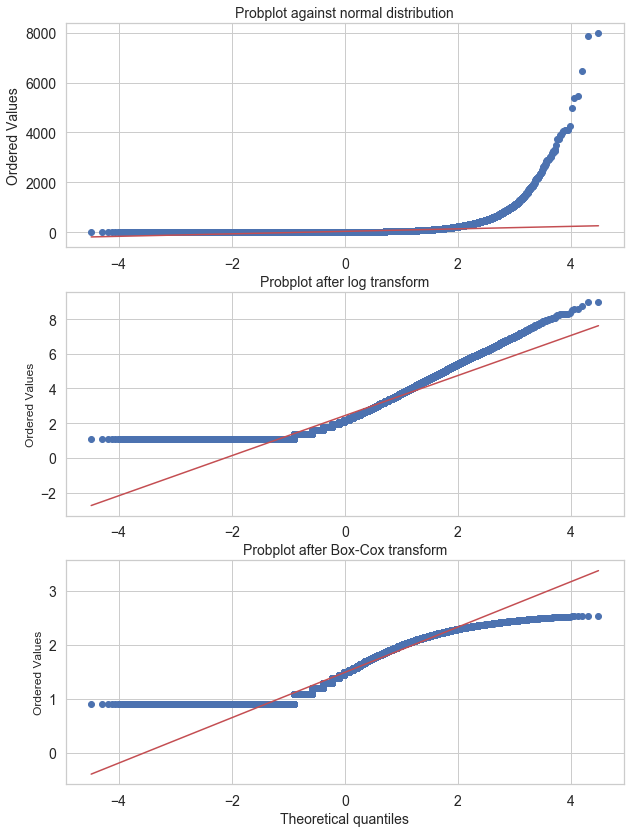

In [40]:
# 그림 2-14
fig2, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10, 14))

prob1 = stats.probplot(biz_df['review_count'], dist=stats.norm, plot=ax1)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Ordered Values', fontsize=14)
ax1.set_title('Probplot against normal distribution', fontsize=14)

prob2 = stats.probplot(biz_df['rc_log'], dist=stats.norm, plot=ax2)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('')
ax1.set_ylabel('Ordered Values', fontsize=14)
ax2.set_title('Probplot after log transform', fontsize=14)

prob3 = stats.probplot(biz_df['rc_bc'], dist=stats.norm, plot=ax3)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('Theoretical quantiles', fontsize=14)
ax1.set_ylabel('Ordered Values', fontsize=14)
ax3.set_title('Probplot after Box-Cox transform', fontsize=14)

## Example 2-15. Feature scaling example

In [41]:
import sklearn.preprocessing as preproc

In [42]:
news_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,log_n_tokens_content
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,2.342423
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,2.408240
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,2.326336
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,2.725912
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,3.030600


In [43]:
# 원본 데이터 확인 - 기사의 단어 수
# news_df['n_tokens_content'].as_matrix() --> warning
news_df['n_tokens_content'].values

array([219., 255., 211., ..., 442., 682., 157.])

In [44]:
# Min-max scaling
news_df['minmax'] = preproc.minmax_scale(news_df[['n_tokens_content']])
news_df['minmax'].values

array([0.02584376, 0.03009205, 0.02489969, ..., 0.05215955, 0.08048147,
       0.01852726])

In [45]:
# 표준화 - 정의에 따라 일부 출력은 음수가 될 수 있다.
news_df['standardized'] = preproc.StandardScaler().fit_transform(news_df[['n_tokens_content']])
news_df['standardized'].values

array([-0.69521045, -0.61879381, -0.71219192, ..., -0.2218518 ,
        0.28759248, -0.82681689])

In [46]:
# L2-normalization
news_df['l2_normalized'] = preproc.normalize(news_df[['n_tokens_content']], axis=0)
news_df['l2_normalized'].values

array([0.00152439, 0.00177498, 0.00146871, ..., 0.00307663, 0.0047472 ,
       0.00109283])

## Example 2-16. Plotting the histograms of original and scaled data

Text(0.5,39.5,'L2-normalized word count')

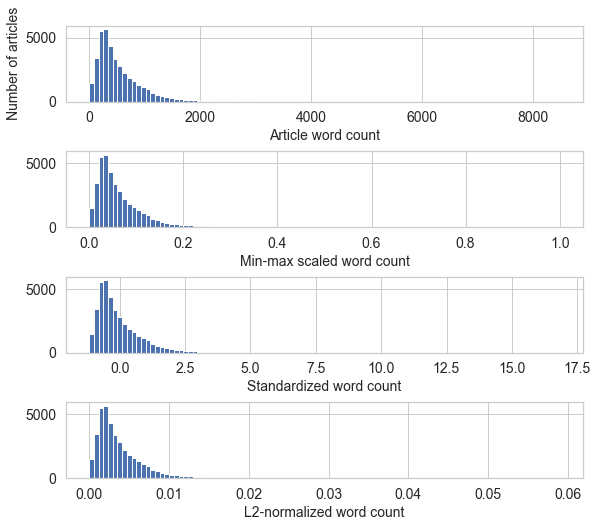

In [47]:
# 그림 2-18

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(8, 7))
fig.tight_layout(h_pad=2.0)

news_df['n_tokens_content'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Article word count', fontsize=14)
ax1.set_ylabel('Number of articles', fontsize=14)

news_df['minmax'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Min-max scaled word count', fontsize=14)
# ax2.set_ylabel('Number of articles', fontsize=14)

news_df['standardized'].hist(ax=ax3, bins=100)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('Standardized word count', fontsize=14)
# ax3.set_ylabel('Number of articles', fontsize=14)

news_df['l2_normalized'].hist(ax=ax4, bins=100)
ax4.tick_params(labelsize=14)
ax4.set_xlabel('L2-normalized word count', fontsize=14)
# ax4.set_ylabel('Number of articles', fontsize=14)

## Example 2-17. Example of interaction features in prediction

In [48]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preproc

In [49]:
# UCI Online News Popularity dataset
news_df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [50]:
# 파생 피쳐를 제외하고 컨텐츠 기반 피쳐만을 선택하여 모델에서 사용한다.
features = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
            'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 
            'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus',
            'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world']

In [51]:
X = news_df[features]
y = news_df[['shares']]

X.shape

(39644, 17)

In [52]:
# 쌍별 조합을 이용한 상호작용 피쳐 생성. 상수 편향은 무시.
# 피쳐의 수 확인!
X2 = preproc.PolynomialFeatures(include_bias=False).fit_transform(X)
X2.shape

(39644, 170)

In [53]:
# 두 개의 피쳐 집합을 모두 트레이닝셋/테스트셋으로 분할
X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(X, X2, y, test_size=0.3, random_state=123)

In [54]:
def evaluate_feature(X_train, X_test, y_train, y_test):
    """Fit a linear regression model on the training set and score on the test set"""
    model = linear_model.LinearRegression().fit(X_train, y_train)
    r_score = model.score(X_test, y_test)
    return (model, r_score)

In [55]:
# 두 피쳐 집합에 대해 모델을 학습시키고 점수를 비교

(m1, r1) = evaluate_feature(X1_train, X1_test, y_train, y_test)
print("R-squared score with singleton features: %0.5f" % r1)

(m2, r2) = evaluate_feature(X2_train, X2_test, y_train, y_test)
print("R-squared score with pairwise features: %0.10f" % r2)

R-squared score with singleton features: 0.00924
R-squared score with pairwise features: 0.0113280904
